## Assignment 1 : Data Preparation 

 1. Name    : Vaibhav Bichave
 2. class   : TE 10 (L-10)
 3. Roll No.: 33209

Download heart dataset from following link.
[https://www.kaggle.com/zhaoyingzhu/heartcsv](https://www.kaggle.com/zhaoyingzhu/heartcsv)


Perform following operation on given dataset.
1. Find Shape of Data
2. Find Missing Values
3. Find data type of each column
4. Finding out Zero's
5. Find Mean age of patients
6. Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training (75%) and testing (25%).

Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually positive. Total 50 people in my sample were actually COVID positive. I have total 500 samples.
Create confusion matrix based on above data and find
I. Accuracy
II. Precision
III. Recall
IV. F-1 score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataFrame=pd.read_csv('heart.csv')

In [3]:
dataFrame.shape

(303, 15)

In [4]:
dataFrame.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
dataFrame.tail()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [6]:
dataFrame=dataFrame.drop("Unnamed: 0",axis =1)

In [7]:
dataFrame.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [8]:
dataFrame.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [9]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [10]:
dataFrame.Ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [11]:
dataFrame.Sex.value_counts()

1    206
0     97
Name: Sex, dtype: int64

In [12]:
dataFrame.isnull()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
dataFrame.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [11]:
dataFrame.Age.mean()

54.43894389438944

In [15]:
dataFrame.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [16]:
dataFrame["Age"].mean(axis=0)

54.43894389438944

In [14]:
var=dataFrame.loc[:,['Age','Sex','ChestPain','RestBP','Chol']]

In [15]:
var

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [19]:
# Splitting the dataset into train and test sets: 75-25 split

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(var, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((227, 5), (76, 5))

In [20]:
tp=90
fp=11
fn=19
tn=40
acc=(tp+tn)/(tp+fp+fn+tn)
pre=tp/(tp+fp)
rec=tp/(tp+fn)
print("Accuracy is : {}".format(acc))
print("Precision is : {}".format(pre))
print("Recall is : {}".format(rec))
print("F1-Score is : {}".format((2*pre*rec)/(pre+rec)))

Accuracy is : 0.8125
Precision is : 0.8910891089108911
Recall is : 0.8256880733944955
F1-Score is : 0.8571428571428572


## Data Visualization

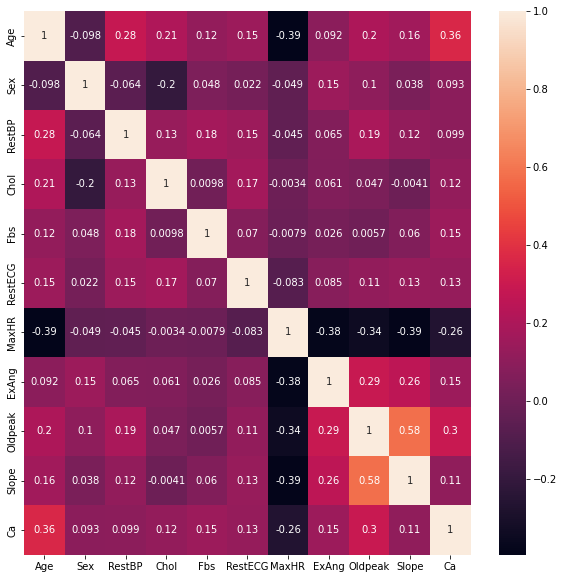

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(dataFrame.corr(), annot=True)
plt.show()

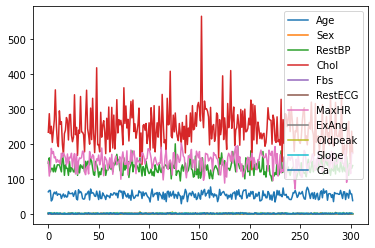

In [22]:
dataFrame.plot();

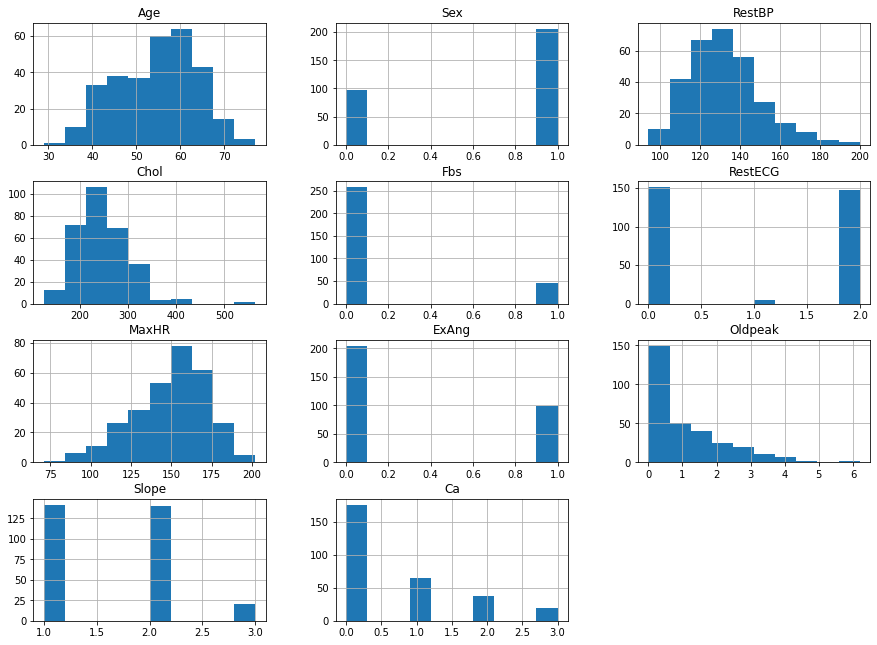

In [23]:
dataFrame.hist(bins = 10,figsize = (15,11));

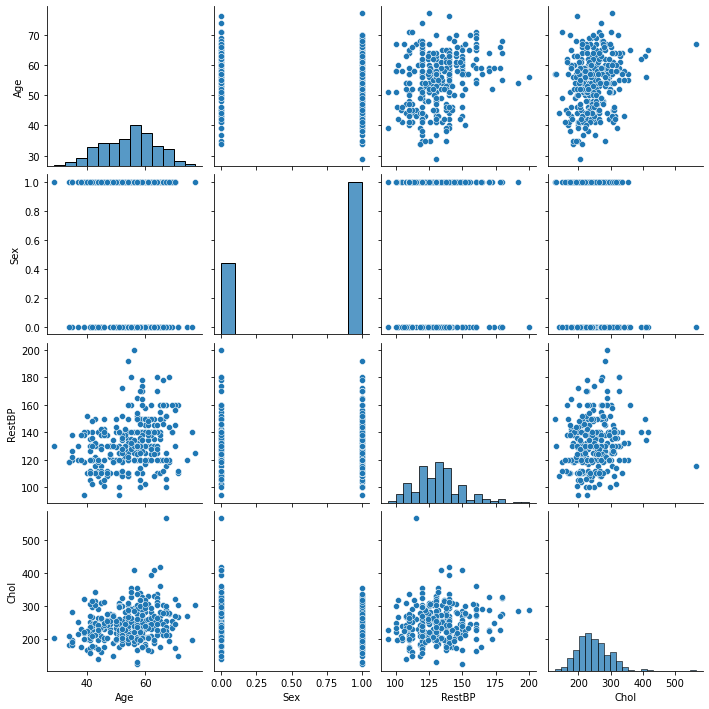

In [24]:
sns.pairplot(var);

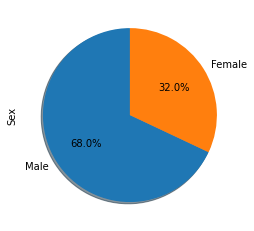

In [25]:
labels=['Male','Female']
dataFrame.Sex.value_counts().plot(kind= "pie",labels =labels,startangle=90,shadow=True,
                                  explode=(0,0),autopct='%1.1f%%' );

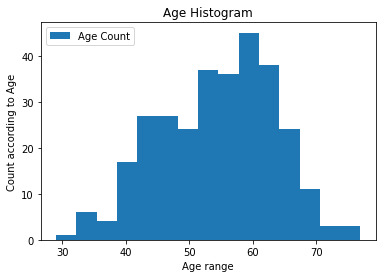

In [26]:
plt.hist(dataFrame["Age"],bins=15,label="Age Count")
plt.title("Age Histogram")
plt.xlabel("Age range")
plt.ylabel("Count according to Age")
plt.legend(loc="upper left");

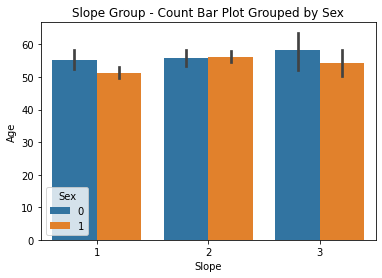

In [27]:
sns.barplot(x = "Slope", y = "Age", hue = "Sex", data = dataFrame)
plt.title("Slope Group - Count Bar Plot Grouped by Sex")
plt.show()

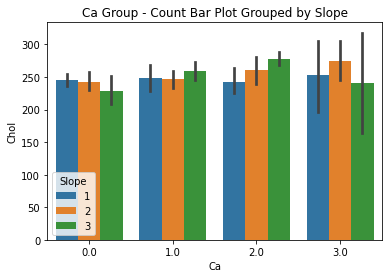

In [28]:
sns.barplot(x = "Ca", y = "Chol", hue = "Slope", data = dataFrame)
plt.title("Ca Group - Count Bar Plot Grouped by Slope")
plt.show()

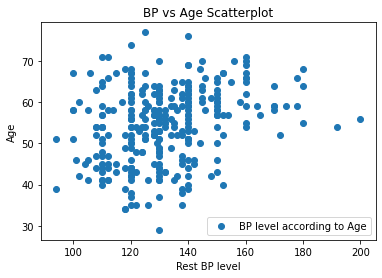

In [29]:
plt.scatter(dataFrame["RestBP"],dataFrame["Age"],label="BP level according to Age")
plt.title("BP vs Age Scatterplot")
plt.xlabel("Rest BP level")
plt.ylabel("Age")
plt.legend(loc="lower right");

### Conclusion:
1. We have explored Heart dataset.
2. Plot various graph to get insight from it.
3. We have also find Shape of Data,find Missing Values,find data type of each column.
4. We have also finding out Zero's,find Mean age of patients
5. We have also successfully plot various graphs on Heart Data.